# Freemont Bridge Bicycle Usage Analysis
by David Michelman

## Part 1

west median  47
east median  53
west mean  73.7633136095
east mean  77.0118343195
all west modes: [1]
all east modes: [1]



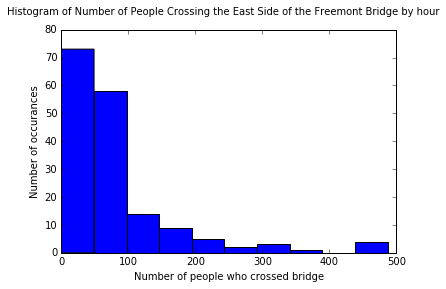

In [24]:
%matplotlib inline
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from dateutil import parser
from collections import Counter

foobar = open('newfilethatneedstobefound', 'w')

#File Reading
#Emma Anderson, Big Data, 1/22/16
#open and save the file for reading
data_file = open("FreBridge.csv", "r")
#create an empty list to store the data
data_list = []
#put all lines from the file into a list
for ii in data_file:
    data_list.append(ii)

#remove the first element (column header)
del data_list[0]
#create empty lists for westbound and eastbound bikes
west = list()
east = list()
times = list()
for jj in range(len(data_list)):
    # strip off the \n (newline)
    data_list[jj] = data_list[jj].replace("\n", "")
    # make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",")
    # add data to specific lists for west and east
    west.append(int(data_list[jj][1]))
    east.append(int(data_list[jj][2]))
    times.append(data_list[jj][0])

west = np.array(west)
east = np.array(east)
times = np.array(times)


print("west median ", stat.median(west))
print("east median ", stat.median(east))

print("west mean ", stat.mean(west))
print("east mean ", stat.mean(east))


# function that returns all of the modes for a dataset
def all_modes(dataset):
    data_west = Counter(west)
    most_common = data_west.most_common(1)
    modes = list()
    modes.append(most_common[0][0])
    greatest_occurance = most_common[0][1]
    most_common.append(most_common[0][0])
    whole_list = data_west.most_common()
    for i in range(1, len(whole_list)):
        if whole_list[i][1] == greatest_occurance:
            modes.append(whole_list[i][0])
        else:
            break
    return (modes)

print("all west modes:", all_modes(west))
print("all east modes:", all_modes(east))

print()


data_east = Counter(west)
# print("east mode:", data_east.most_common(1)[0][0], "with", data_east.most_common(1)[0][0] + "occurances")

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# ax1.hist(west)
# fig1.suptitle('west')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.hist(east)
fig2.suptitle('Histogram of Number of People Crossing the East Side of the Freemont Bridge by hour')
plt.xlabel('Number of people who crossed bridge')
plt.ylabel('Number of occurances')

I would argue that the median is the most useful piece of information because it tells us how many people cross the bridge on an average day (not the average number of people to cross the bridge). It isn't skewed by single days when very high numbers of people cross. The mode is not useful because it counts days where 97, 98, or 99 people cross separately even though they are incredibly similar. The computed mode was 1, which doesn't really represent the data.

## Part 2

In [1]:
%matplotlib inline
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from dateutil import parser
from collections import Counter

previous_fridays = ('07/05/2013', '07/13/2013', '07/20/2013', '07/27/2013', '07/04/2014', '07/11/2014',
'07/18/2014', '07/25/2014', '07/03/2015', '07/10/2015', '07/17/2015', '07/24/2015', '07/31/2015')


#load the data file
data_file = open('Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')
data_by_line = list()
for line in data_file:
    data_by_line.append(line)

print("loading " + str(len(data_by_line)) + " data points")

date_raw = np.empty(len(data_by_line), dtype=object)
west_data = np.empty(len(data_by_line))
east_data = np.empty(len(data_by_line))

for n_line in range(0, len(data_by_line)):
    line_pre = data_by_line[n_line].replace("\n", "").replace("\r", "")
    line_elements = line_pre.split(',')
    try:
        date_raw[n_line] = str(line_elements[0])
        west_data[n_line] = line_elements[1]
        east_data[n_line] = line_elements[2]
    except:
        west_data[n_line] = -1
        east_data[n_line] = -1

date_sums = np.zeros(len(previous_fridays))

for n in range(0, date_sums.shape[0]):
    for i in range(0, date_raw.shape[0]):
        if date_raw[i].find(previous_fridays[n]) != -1:
            date_sums[n] += (west_data[i] + east_data[i])

    
#compute the average without outliers (in statistical sense)
stdev = np.std(date_sums)
average = np.mean(date_sums)

filtered_counts = list()
outliers = list()

for term in date_sums:
    if abs(average - term) < stdev * 1.5:
        filtered_counts.append(int(term))
    else:
        outliers.append(term)
average = np.mean(np.array(filtered_counts))


print("There will probably be", average, "bicyclists crossing the Freemont Bridge on any Friday in July 2016")

# print all the outliers with appropriate comma and 'and' placement
if len(outliers) > 0:
    print("The outliers", end = '')
    for i in range(0, len(outliers) - 1):
        print(" " + str(outliers[i]) + ",", end = '')
    print(" and " + str(outliers[len(outliers) - 1]), end = '')
        
              
    print(" were removed before averaging")

loading 28440 data points
There will probably be 3463.08333333 bicyclists crossing the Freemont Bridge on any Friday in July 2016
The outliers and 2313.0 were removed before averaging


Given the relatively small dataset, only 13 different Fridays are being considered, so I made a prediction for any Friday in July. Making a prediction for a specific Friday would only let me consider 4 data points, which I deemed too small. I computed the mean of the 13 Fridays considered after removing outliers. I did so because there might have been a holiday or other special circumstances (such as a road closure) that would create outliers but wouldn't be representative of the whole population of Fridays. There turned out to be a single outlier when only 2313 cyclists crossed the bridge.

I used the mean instead of the median because outliers were already removed. The mean is typically less sensitive to skewed distributions, but the removal of statistical outliers makes it un-necessary. While I wouldn't consider this to be perfect statisitcal analasys, the outlier might not be a one-time event, removing it probably gives a more accurate estimate.